# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import tensorflow

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = tensorflow.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = [0.001,0.005, 0.01]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.9

In [9]:
results = {}
for lr in LEARNING_RATE:
    print(f"Experiment with SGD and LR = {lr}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = tensorflow.keras.optimizers.SGD(lr=lr, decay=0.0, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-sgd-lr-%s" % (str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with SGD and LR = 0.001
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
196/196 [==============================] - 12s 57ms/step - loss: 2.0917 - accuracy: 0.2478 - val_loss: 1.9555 - val_accuracy: 0.2985
Epoch 2/20
196/196 [==============================] - 9s 47ms/step - loss: 1.8871 - accuracy: 0.3372 - val_loss: 1.8440 - val_accuracy: 0.3565
Epoch 3/20
196/196 [==============================] - 11s 58ms/step - loss: 1.8030 - accuracy: 0.3731 - val_loss: 1.7809 - val_accuracy: 0.3787
Epoch 4/20
196/196 [==============================] - 11s 55ms/step - loss: 1.7503 - accuracy: 0.3905 - val_loss: 1.7322 - val_accuracy: 0.3967
Epoch 5/20
196/196 [==============================] - 11s 54ms/step - loss: 1.7099 - accuracy: 0.4067 - val_loss: 1.6926 - val_accuracy: 0.4146
Epoch 6/20
196/196 [==============================] - 10s 52ms/step - loss: 1.6748 - accuracy: 0.4161 - val_loss: 1.6680 - val_accuracy: 0.4198
Epoch 7/20
196/196 [==============================] - 10s 52ms/step - loss: 1.6469 - accuracy: 0.4276 - val_loss: 1.6418 - val_accuracy: 

In [11]:
for lr in LEARNING_RATE:
    print(f"Experiment with RMSprop and LR = {lr}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = tensorflow.keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-rmsprop-lr-%s" % (str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with RMSprop and LR = 0.001
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
196/196 [==============================] - 14s 65ms/step - loss: 2.2702 - accuracy: 0.2186 - val_loss: 2.0735 - val_accuracy: 0.2590
Epoch 2/20
196/196 [==============================] - 12s 63ms/step - loss: 1.8869 - accuracy: 0.3168 - val_loss: 1.8230 - val_accuracy: 0.3369
Epoch 3/20
196/196 [==============================] - 12s 64ms/step - loss: 1.7860 - accuracy: 0.3574 - val_loss: 1.7294 - val_accuracy: 0.3789
Epoch 4/20
196/196 [==============================] - 14s 71ms/step - loss: 1.7160 - accuracy: 0.3827 - val_loss: 1.7042 - val_accuracy: 0.3917
Epoch 5/20
196/196 [==============================] - 12s 63ms/step - loss: 1.6599 - accuracy: 0.4071 - val_loss: 1.7620 - val_accuracy: 0.3662
Epoch 6/20
196/196 [==============================] - 12s 64ms/step - loss: 1.6163 - accuracy: 0.4238 - val_loss: 1.6941 - val_accuracy: 0.3946
Epoch 7/20
196/196 [==============================] - 13s 64ms/step - loss: 1.5793 - accuracy: 0.4363 - val_loss: 1.6397 - val_accuracy:

In [13]:
for lr in LEARNING_RATE:
    print(f"Experiment with Adam and LR = {lr}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = tensorflow.keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-adam-lr-%s" % (str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Adam and LR = 0.001
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
196/196 [==============================] - 13s 61ms/step - loss: 1.9432 - accuracy: 0.2970 - val_loss: 1.7594 - val_accuracy: 0.3620
Epoch 2/20
196/196 [==============================] - 11s 57ms/step - loss: 1.7037 - accuracy: 0.3907 - val_loss: 1.6104 - val_accuracy: 0.4257
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 1.6336 - accuracy: 0.4159 - val_loss: 1.5858 - val_accuracy: 0.4365
Epoch 4/20
196/196 [==============================] - 11s 55ms/step - loss: 1.5606 - accuracy: 0.4444 - val_loss: 1.5391 - val_accuracy: 0.4487
Epoch 5/20
196/196 [==============================] - 11s 55ms/step - loss: 1.5093 - accuracy: 0.4627 - val_loss: 1.4978 - val_accuracy: 0.4654
Epoch 6/20
196/196 [==============================] - 11s 56ms/step - loss: 1.4641 - accuracy: 0.4775 - val_loss: 1.5779 - val_accuracy: 0.4353
Epoch 7/20
196/196 [==============================] - 11s 56ms/step - loss: 1.4492 - accuracy: 0.4816 - val_loss: 1.4837 - val_accuracy:

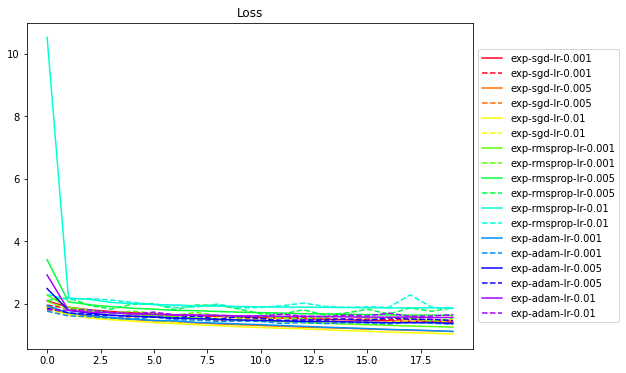

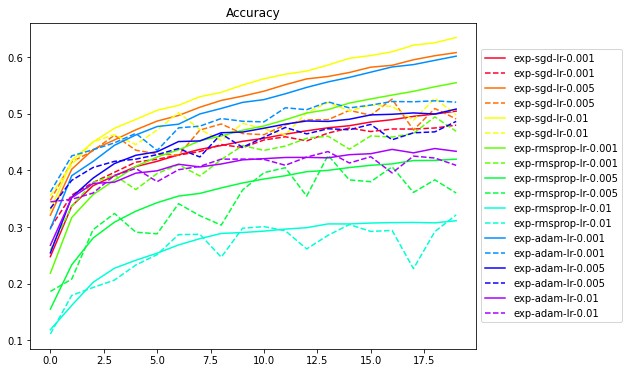

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()